In [1]:
# Packages:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap, to_hex

# Display options:
pd.set_option("display.width", 1200)
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
df_movies = pd.read_csv("movies.csv", sep = ";")
df_critic = pd.read_csv("critic.csv", sep = ";")

In [3]:
df_movies

,title,year,bond_actor,director,box_office_millions_actual,box_office_millions_2005,budget_millions_actual,budget_millions_2005,ref
0,Dr. No,1962,Sean Connery,Terence Young,59.5,448.8,1.1,7.0,[14][15]
1,From Russia with Love,1963,Sean Connery,Terence Young,78.9,543.8,2.0,12.6,[14][15][16]
2,Goldfinger,1964,Sean Connery,Guy Hamilton,124.9,820.4,3.0,18.6,[14][15][17]
3,Thunderball,1965,Sean Connery,Terence Young,141.2,848.1,6.8,41.9,[14][15][18]
4,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,111.6,514.2,10.3,59.9,[15][19]
5,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,64.6,291.5,7.0,37.3,[14][15]
6,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,116.0,442.5,7.2,34.7,[14][15][20]
7,Live and Let Die,1973,Roger Moore,Guy Hamilton,126.4,460.3,7.0,30.8,[14][15]
8,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,97.6,334.0,7.0,27.7,[15][21]
9,The Spy Who Loved Me,1977,Roger Moore,Lewis Gilbert,185.4,533.0,14.0,45.1,[14][15][22]


In [4]:
df_critic

,movie,rotten_tomatoes,metacritic,cinemascore
0,Dr. No,95% (60 reviews)[56],78 (8 reviews)[57],NaN
1,From Russia with Love,95% (62 reviews)[58],83 (18 reviews)[59],NaN
2,Goldfinger,99% (69 reviews)[60],87 (12 reviews)[61],NaN
3,Thunderball,87% (52 reviews)[62],64 (9 reviews)[63],NaN
4,You Only Live Twice,73% (52 reviews)[64],61 (14 reviews)[65],NaN
5,On Her Majesty's Secret Service,81% (54 reviews)[66],61 (12 reviews)[67],NaN
6,Diamonds Are Forever,64% (50 reviews)[68],59 (11 reviews)[69],NaN
7,Live and Let Die,65% (52 reviews)[70],55 (9 reviews)[71],NaN
8,The Man with the Golden Gun,39% (51 reviews)[72],43 (11 reviews)[73],NaN
9,The Spy Who Loved Me,80% (56 reviews)[74],55 (12 reviews)[75],NaN


In [5]:
df_movies.dtypes

title                          object
year                            int64
bond_actor                     object
director                       object
box_office_millions_actual    float64
box_office_millions_2005      float64
budget_millions_actual        float64
budget_millions_2005          float64
ref                            object
dtype: object

In [6]:
df_critic.dtypes

movie              object
rotten_tomatoes    object
metacritic         object
cinemascore        object
dtype: object

In [7]:
df = pd.concat([df_movies, df_critic], axis = 1).iloc[:,[i for i in range(0,12) if i not in [8, 9]]]
df

,title,year,bond_actor,director,box_office_millions_actual,box_office_millions_2005,budget_millions_actual,budget_millions_2005,rotten_tomatoes,metacritic
0,Dr. No,1962,Sean Connery,Terence Young,59.5,448.8,1.1,7.0,95% (60 reviews)[56],78 (8 reviews)[57]
1,From Russia with Love,1963,Sean Connery,Terence Young,78.9,543.8,2.0,12.6,95% (62 reviews)[58],83 (18 reviews)[59]
2,Goldfinger,1964,Sean Connery,Guy Hamilton,124.9,820.4,3.0,18.6,99% (69 reviews)[60],87 (12 reviews)[61]
3,Thunderball,1965,Sean Connery,Terence Young,141.2,848.1,6.8,41.9,87% (52 reviews)[62],64 (9 reviews)[63]
4,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,111.6,514.2,10.3,59.9,73% (52 reviews)[64],61 (14 reviews)[65]
5,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,64.6,291.5,7.0,37.3,81% (54 reviews)[66],61 (12 reviews)[67]
6,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,116.0,442.5,7.2,34.7,64% (50 reviews)[68],59 (11 reviews)[69]
7,Live and Let Die,1973,Roger Moore,Guy Hamilton,126.4,460.3,7.0,30.8,65% (52 reviews)[70],55 (9 reviews)[71]
8,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,97.6,334.0,7.0,27.7,39% (51 reviews)[72],43 (11 reviews)[73]
9,The Spy Who Loved Me,1977,Roger Moore,Lewis Gilbert,185.4,533.0,14.0,45.1,80% (56 reviews)[74],55 (12 reviews)[75]


In [8]:
# New features:
df["rotten_tomatoes_score"] = [int(i[0:2]) for i in df["rotten_tomatoes"]]
df["rotten_tomatoes_count"] = [int(i[5:8]) for i in df["rotten_tomatoes"]]
df["metacritic_score"] = [int(i[0:2]) for i in df["metacritic"]]
df["metacritic_count"] = [int(i[4:6]) for i in df["metacritic"]]
df["boxoffice_over_budget"] = round(df["box_office_millions_actual"]/df["budget_millions_actual"], 2)
df["mean_score"] = round(df[["rotten_tomatoes_score", "metacritic_score"]].mean(axis = 1), 2)

In [9]:
df.head()

,title,year,bond_actor,director,box_office_millions_actual,box_office_millions_2005,budget_millions_actual,budget_millions_2005,rotten_tomatoes,metacritic,rotten_tomatoes_score,rotten_tomatoes_count,metacritic_score,metacritic_count
0,Dr. No,1962,Sean Connery,Terence Young,59.5,448.8,1.1,7.0,95% (60 reviews)[56],78 (8 reviews)[57],95,60,78,8
1,From Russia with Love,1963,Sean Connery,Terence Young,78.9,543.8,2.0,12.6,95% (62 reviews)[58],83 (18 reviews)[59],95,62,83,18
2,Goldfinger,1964,Sean Connery,Guy Hamilton,124.9,820.4,3.0,18.6,99% (69 reviews)[60],87 (12 reviews)[61],99,69,87,12
3,Thunderball,1965,Sean Connery,Terence Young,141.2,848.1,6.8,41.9,87% (52 reviews)[62],64 (9 reviews)[63],87,52,64,9
4,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,111.6,514.2,10.3,59.9,73% (52 reviews)[64],61 (14 reviews)[65],73,52,61,14


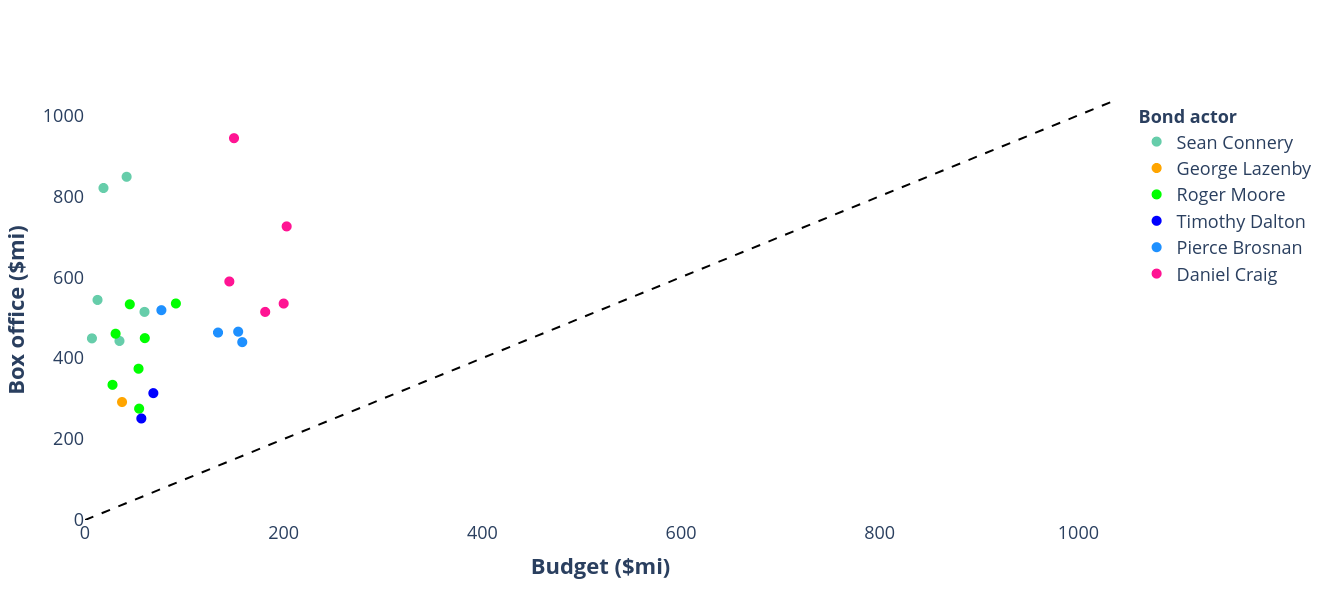

In [11]:
# Variables:
x_var = "budget_millions_2005"
x_var_name = "Budget ($mi)"
y_var = "box_office_millions_2005"
y_var_name = "Box office ($mi)"
color_var = "bond_actor"
color_var_name = "Bond actor"

# Plot:
lvls = df[color_var].unique()
n_levels = len(lvls)
my_palette = ["#66cdaa", "#ffa500", "#00ff00", "#0000ff", "#1e90ff", "#ff1493"]
max_val = df[[x_var, y_var]].max().max()*1.1

fig = go.Figure()
for l, lvl in enumerate(lvls):
    fig.add_trace(
        go.Scatter(
            x = df[x_var][df[color_var] == lvl],
            y = df[y_var][df[color_var] == lvl],
            mode = "markers",
            marker = {
                "size": 10,
                "color": my_palette[l]
            },
            name = lvl,
            customdata = df[["title",
                             "year",
                             "bond_actor",
                             "director",
                             "box_office_millions_2005",
                             "budget_millions_2005",
                             "rotten_tomatoes_score",
                             "metacritic_score"]][df[color_var] == lvl],
            hovertemplate = "<b>Title:</b> %{customdata[0]}<br>" +
                            "<b>Year:</b> %{customdata[1]}<br>" +
                            "<b>Bond:</b> %{customdata[2]}<br>" +
                            "<b>Director:</b> %{customdata[3]}<br>" +
                            "<b>Box office ($mi):</b> %{customdata[4]}<br>" +
                            "<b>Budget ($mi):</b> %{customdata[5]}<br>" +
                            "<b>Rotten Tomatoes Score:</b> %{customdata[6]}<br>" +
                            "<b>Metacritic Score:</b> %{customdata[7]}<br>" +
                            "<extra></extra>"          
        )        
    )
fig.add_trace(
    go.Scatter(
        x = [0, max_val],
        y = [0, max_val],
        mode = "lines",
        line = {
            "width": 2,
            "color": "black",
            "dash": "dash"
        },
        showlegend = False
    )
)
fig.update_layout(
    xaxis_title = "<b>" + x_var_name + "</b>" ,
    yaxis_title = "<b>" + y_var_name + "</b>",
    xaxis_range = [0, max_val],
    yaxis_range = [0, max_val],
    font = dict(
        size = 18
    ),
    showlegend = True,
    legend_title_text = "<b>" + color_var_name + "</b>",
    plot_bgcolor = "white",
    hoverlabel = dict(
        font_size = 20,
        font_family = "Rockwell"
    ),
    height = 600,
    width = 780
)
fig.show()

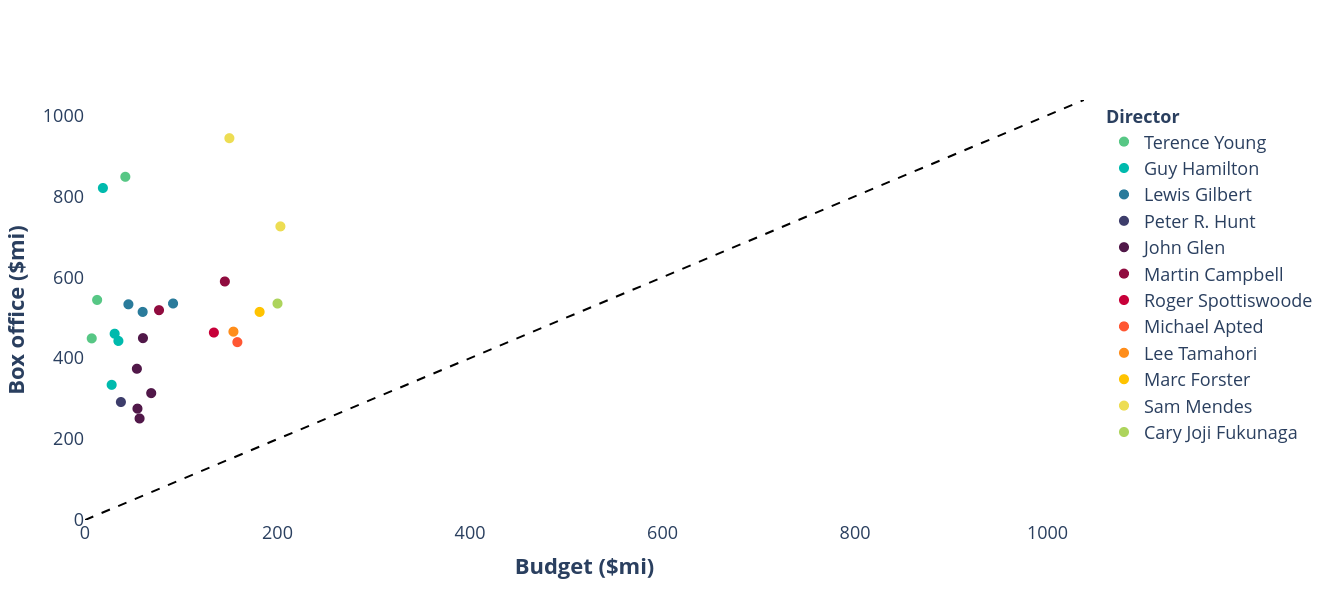

In [12]:
# Variables:
x_var = "budget_millions_2005"
x_var_name = "Budget ($mi)"
y_var = "box_office_millions_2005"
y_var_name = "Box office ($mi)"
color_var = "director"
color_var_name = "Director"

# Plot:
lvls = df[color_var].unique()
n_levels = len(lvls)
my_palette = ["#57c785", "#00baad", "#2a7b9b", "#3d3d6b", "#511849", "#900c3f", "#c70039", "#ff5733", "#ff8d1a", "#ffc300", "#eddd53", "#add45c"]
max_val = df[[x_var, y_var]].max().max()*1.1

fig = go.Figure()
for l, lvl in enumerate(lvls):
    fig.add_trace(
        go.Scatter(
            x = df[x_var][df[color_var] == lvl],
            y = df[y_var][df[color_var] == lvl],
            mode = "markers",
            marker = {
                "size": 10,
                "color": my_palette[l]
            },
            name = lvl,
            customdata = df[["title",
                             "year",
                             "bond_actor",
                             "director",
                             "box_office_millions_2005",
                             "budget_millions_2005",
                             "rotten_tomatoes_score",
                             "metacritic_score"]][df[color_var] == lvl],
            hovertemplate = "<b>Title:</b> %{customdata[0]}<br>" +
                            "<b>Year:</b> %{customdata[1]}<br>" +
                            "<b>Bond:</b> %{customdata[2]}<br>" +
                            "<b>Director:</b> %{customdata[3]}<br>" +
                            "<b>Box office ($mi):</b> %{customdata[4]}<br>" +
                            "<b>Budget ($mi):</b> %{customdata[5]}<br>" +
                            "<b>Rotten Tomatoes Score:</b> %{customdata[6]}<br>" +
                            "<b>Metacritic Score:</b> %{customdata[7]}<br>" +
                            "<extra></extra>"          
        )        
    )
fig.add_trace(
    go.Scatter(
        x = [0, max_val],
        y = [0, max_val],
        mode = "lines",
        line = {
            "width": 2,
            "color": "black",
            "dash": "dash"
        },
        showlegend = False
    )
)
fig.update_layout(
    xaxis_title = "<b>" + x_var_name + "</b>" ,
    yaxis_title = "<b>" + y_var_name + "</b>",
    xaxis_range = [0, max_val],
    yaxis_range = [0, max_val],
    font = dict(
        size = 18
    ),
    showlegend = True,
    legend_title_text = "<b>" + color_var_name + "</b>",
    plot_bgcolor = "white",
    hoverlabel = dict(
        font_size = 20,
        font_family = "Rockwell"
    ),
    height = 600,
    width = 780
)
fig.show()

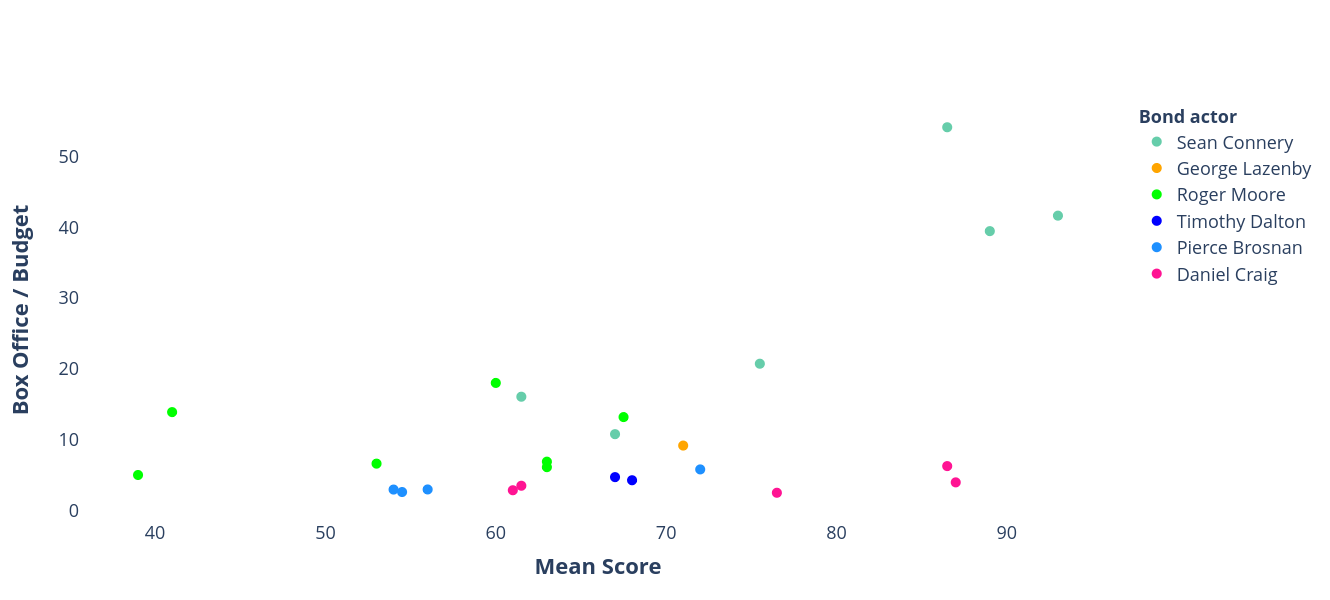

In [34]:
# Variables:
x_var = "mean_score"
x_var_name = "Mean Score"
y_var = "boxoffice_over_budget"
y_var_name = "Box Office / Budget"
color_var = "bond_actor"
color_var_name = "Bond actor"

# Plot:
lvls = df[color_var].unique()
my_palette = ["#66cdaa", "#ffa500", "#00ff00", "#0000ff", "#1e90ff", "#ff1493"]

fig = go.Figure()
for l, lvl in enumerate(lvls):
    fig.add_trace(
        go.Scatter(
            x = df[x_var][df[color_var] == lvl],
            y = df[y_var][df[color_var] == lvl],
            mode = "markers",
            marker = {
                "size": 10,
                "color": my_palette[l]
            },
            name = lvl,
            customdata = df[["title",
                             "year",
                             "bond_actor",
                             "director",
                             "box_office_millions_2005",
                             "budget_millions_2005",
                             "rotten_tomatoes_score",
                             "metacritic_score"]][df[color_var] == lvl],
            hovertemplate = "<b>Title:</b> %{customdata[0]}<br>" +
                            "<b>Year:</b> %{customdata[1]}<br>" +
                            "<b>Bond:</b> %{customdata[2]}<br>" +
                            "<b>Director:</b> %{customdata[3]}<br>" +
                            "<b>Box office ($mi):</b> %{customdata[4]}<br>" +
                            "<b>Budget ($mi):</b> %{customdata[5]}<br>" +
                            "<b>Rotten Tomatoes Score:</b> %{customdata[6]}<br>" +
                            "<b>Metacritic Score:</b> %{customdata[7]}<br>" +
                            "<extra></extra>"          
        )        
    )
fig.update_layout(
    xaxis_title = "<b>" + x_var_name + "</b>" ,
    yaxis_title = "<b>" + y_var_name + "</b>",
    font = dict(
        size = 18
    ),
    showlegend = True,
    legend_title_text = "<b>" + color_var_name + "</b>",
    plot_bgcolor = "white",
    hoverlabel = dict(
        font_size = 20,
        font_family = "Rockwell"
    ),
    height = 600,
    width = 1000
)
fig.show()

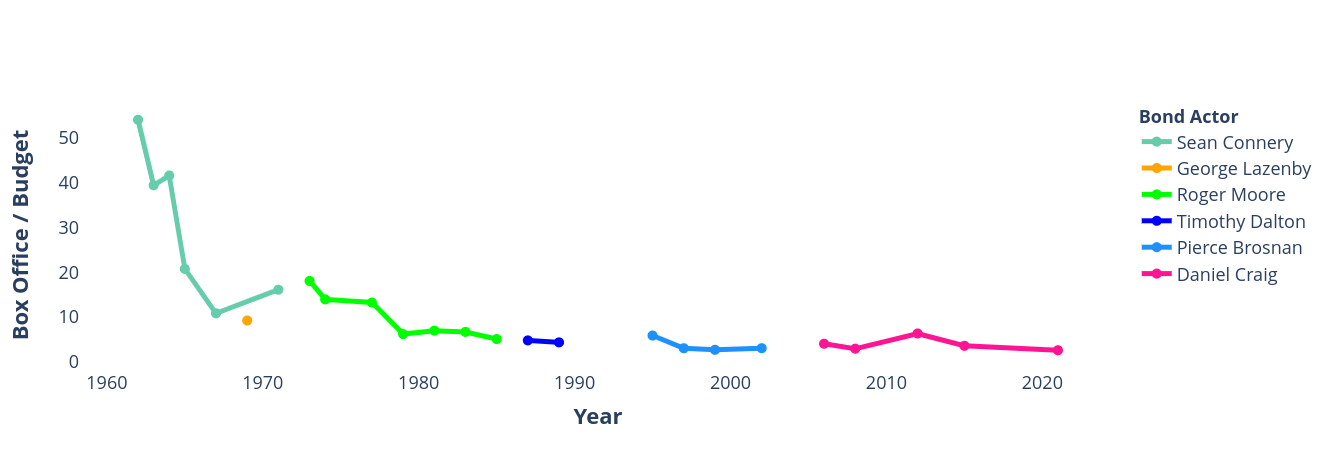

In [42]:
# Variables:
x_var = "year"
x_var_name = "Year"
y_var = "boxoffice_over_budget"
y_var_name = "Box Office / Budget"
color_var = "bond_actor"
color_var_name = "Bond Actor"

# Plot:
my_palette = ["#66cdaa", "#ffa500", "#00ff00", "#0000ff", "#1e90ff", "#ff1493"]
lvls = df[color_var].unique()

fig = go.Figure()
for l, lvl in enumerate(lvls):
    fig.add_trace(
        go.Scatter(
            x = df[x_var][df[color_var] == lvl],
            y = df[y_var][df[color_var] == lvl],
            mode = "lines+markers",
            line = {
                "width": 5,
                "color": my_palette[l]
            },
            marker = {
                "size": 10,
                "color": my_palette[l]
            },
            name = lvl,
            customdata = df[["title",
                             "year",
                             "bond_actor",
                             "director",
                             "boxoffice_over_budget",
                             "box_office_millions_2005",
                             "budget_millions_2005",
                             "rotten_tomatoes_score",
                             "metacritic_score"]][df[color_var] == lvl],
            hovertemplate = "<b>Title:</b> %{customdata[0]}<br>" +
                            "<b>Year:</b> %{customdata[1]}<br>" +
                            "<b>Bond:</b> %{customdata[2]}<br>" +
                            "<b>Director:</b> %{customdata[3]}<br>" +
                            "<b>Box Office / Budget:</b> %{customdata[4]}<br>" +
                            "<b>Box office ($mi):</b> %{customdata[5]}<br>" +
                            "<b>Budget ($mi):</b> %{customdata[6]}<br>" +
                            "<b>Rotten Tomatoes Score:</b> %{customdata[7]}<br>" +
                            "<b>Metacritic Score:</b> %{customdata[8]}<br>" +
                            "<extra></extra>"
        )
    )
fig.update_layout(
    xaxis_title = "<b>" + x_var_name + "</b>" ,
    yaxis_title = "<b>" + y_var_name + "</b>",
    font = dict(
        size = 18
    ),
    showlegend = True,
    legend_title_text = "<b>" + color_var_name + "</b>",
    plot_bgcolor = "white",
    hoverlabel = dict(
        font_size = 20,
        font_family = "Rockwell"
    )
)
fig.show()

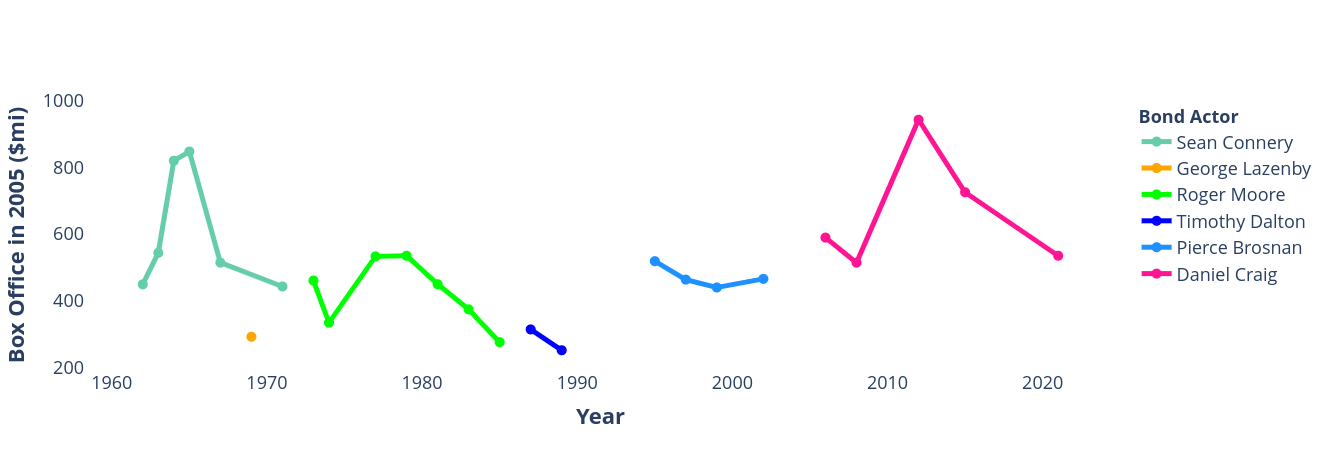

In [44]:
# Variables:
x_var = "year"
x_var_name = "Year"
y_var = "box_office_millions_2005"
y_var_name = "Box Office in 2005 ($mi)"
color_var = "bond_actor"
color_var_name = "Bond Actor"

# Plot:
my_palette = ["#66cdaa", "#ffa500", "#00ff00", "#0000ff", "#1e90ff", "#ff1493"]
lvls = df[color_var].unique()

fig = go.Figure()
for l, lvl in enumerate(lvls):
    fig.add_trace(
        go.Scatter(
            x = df[x_var][df[color_var] == lvl],
            y = df[y_var][df[color_var] == lvl],
            mode = "lines+markers",
            line = {
                "width": 5,
                "color": my_palette[l]
            },
            marker = {
                "size": 10,
                "color": my_palette[l]
            },
            name = lvl,
            customdata = df[["title",
                             "year",
                             "bond_actor",
                             "director",
                             "boxoffice_over_budget",
                             "box_office_millions_2005",
                             "budget_millions_2005",
                             "rotten_tomatoes_score",
                             "metacritic_score"]][df[color_var] == lvl],
            hovertemplate = "<b>Title:</b> %{customdata[0]}<br>" +
                            "<b>Year:</b> %{customdata[1]}<br>" +
                            "<b>Bond:</b> %{customdata[2]}<br>" +
                            "<b>Director:</b> %{customdata[3]}<br>" +
                            "<b>Box Office / Budget:</b> %{customdata[4]}<br>" +
                            "<b>Box office ($mi):</b> %{customdata[5]}<br>" +
                            "<b>Budget ($mi):</b> %{customdata[6]}<br>" +
                            "<b>Rotten Tomatoes Score:</b> %{customdata[7]}<br>" +
                            "<b>Metacritic Score:</b> %{customdata[8]}<br>" +
                            "<extra></extra>"
        )
    )
fig.update_layout(
    xaxis_title = "<b>" + x_var_name + "</b>" ,
    yaxis_title = "<b>" + y_var_name + "</b>",
    font = dict(
        size = 18
    ),
    showlegend = True,
    legend_title_text = "<b>" + color_var_name + "</b>",
    plot_bgcolor = "white",
    hoverlabel = dict(
        font_size = 20,
        font_family = "Rockwell"
    )
)
fig.show()

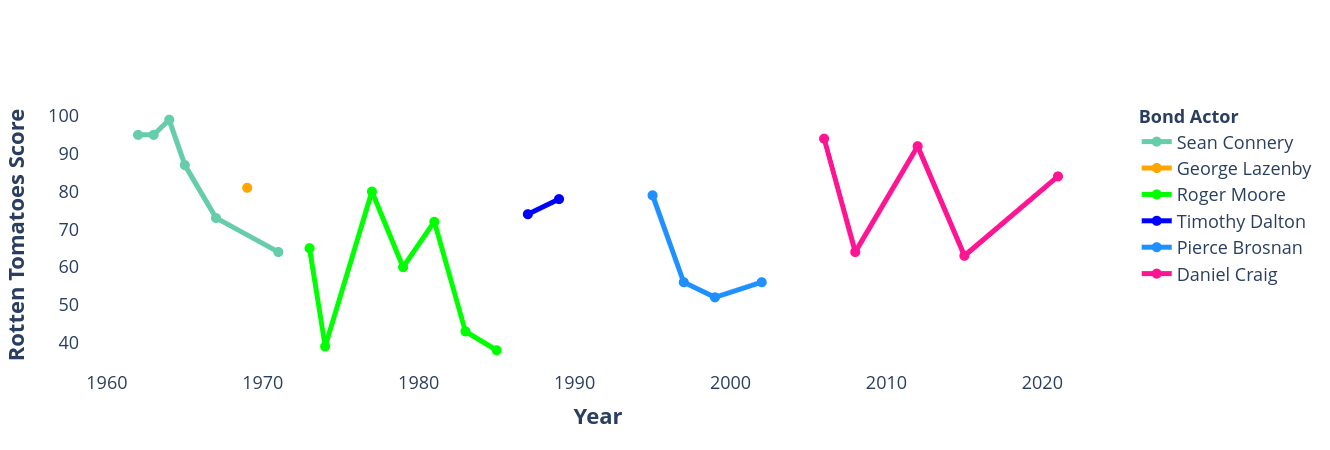

In [47]:
# Variables:
x_var = "year"
x_var_name = "Year"
y_var1 = "rotten_tomatoes_score"
y_var2 = "metacritic_score"
y_var_name = "Scores"
color_var = "bond_actor"
color_var_name = "Bond Actor"

# Plot:
my_palette = ["#66cdaa", "#ffa500", "#00ff00", "#0000ff", "#1e90ff", "#ff1493"]
lvls = df[color_var].unique()

fig = go.Figure()
for l, lvl in enumerate(lvls):
    fig.add_trace(
        go.Scatter(
            x = df[x_var][df[color_var] == lvl],
            y = df[y_var1][df[color_var] == lvl],
            mode = "lines+markers",
            line = {
                "width": 5,
                "color": my_palette[l]
            },
            marker = {
                "size": 10,
                "color": my_palette[l]
            },
            name = lvl,
            customdata = df[["title",
                             "year",
                             "bond_actor",
                             "director",
                             "boxoffice_over_budget",
                             "box_office_millions_2005",
                             "budget_millions_2005",
                             "rotten_tomatoes_score",
                             "metacritic_score"]][df[color_var] == lvl],
            hovertemplate = "<b>Title:</b> %{customdata[0]}<br>" +
                            "<b>Year:</b> %{customdata[1]}<br>" +
                            "<b>Bond:</b> %{customdata[2]}<br>" +
                            "<b>Director:</b> %{customdata[3]}<br>" +
                            "<b>Box Office / Budget:</b> %{customdata[4]}<br>" +
                            "<b>Box office ($mi):</b> %{customdata[5]}<br>" +
                            "<b>Budget ($mi):</b> %{customdata[6]}<br>" +
                            "<b>Rotten Tomatoes Score:</b> %{customdata[7]}<br>" +
                            "<b>Metacritic Score:</b> %{customdata[8]}<br>" +
                            "<extra></extra>"
        )
    )
fig.update_layout(
    xaxis_title = "<b>" + x_var_name + "</b>" ,
    yaxis_title = "<b>" + y_var_name + "</b>",
    font = dict(
        size = 18
    ),
    showlegend = True,
    legend_title_text = "<b>" + color_var_name + "</b>",
    plot_bgcolor = "white",
    hoverlabel = dict(
        font_size = 20,
        font_family = "Rockwell"
    )
)
fig.show()

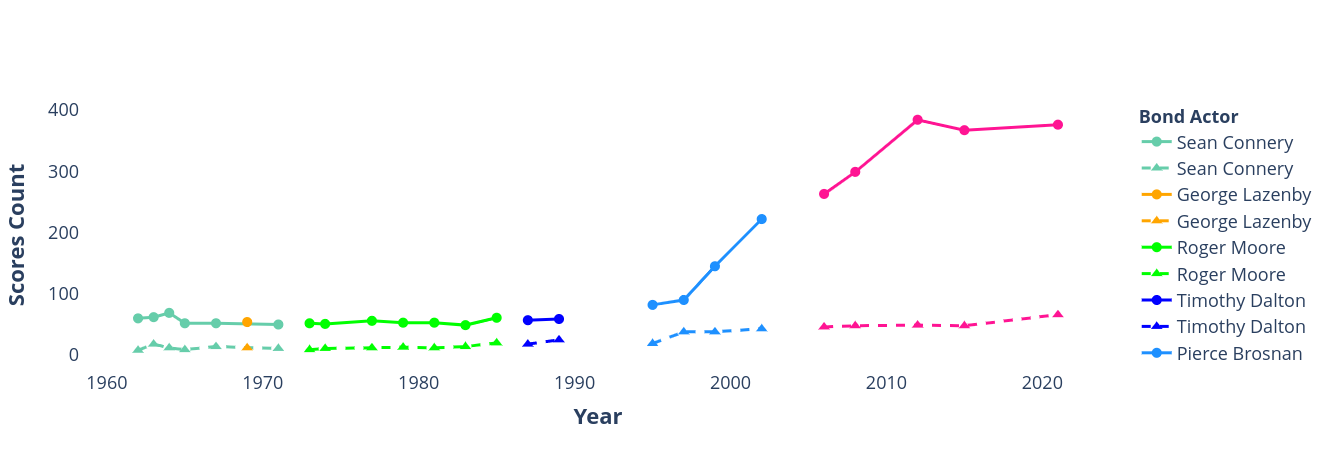

In [62]:
# Variables:
x_var = "year"
x_var_name = "Year"
y_var1 = "rotten_tomatoes_count"
y_var2 = "metacritic_count"
y_var_name = "Scores Count"
color_var = "bond_actor"
color_var_name = "Bond Actor"

# Plot:
my_palette = ["#66cdaa", "#ffa500", "#00ff00", "#0000ff", "#1e90ff", "#ff1493"]
lvls = df[color_var].unique()

fig = go.Figure()
for l, lvl in enumerate(lvls):
    fig.add_trace(
        go.Scatter(
            x = df[x_var][df[color_var] == lvl],
            y = df[y_var1][df[color_var] == lvl],
            mode = "lines+markers",
            line = {
                "width": 3,
                "color": my_palette[l]
            },
            marker = {
                "size": 10,
                "color": my_palette[l],
                "symbol": "circle"
            },
            name = lvl,
            customdata = df[["title",
                             "year",
                             "bond_actor",
                             "director",
                             "boxoffice_over_budget",
                             "box_office_millions_2005",
                             "budget_millions_2005",
                             "rotten_tomatoes_score",
                             "metacritic_score",
                             "rotten_tomatoes_count",
                             "metacritic_count"]][df[color_var] == lvl],
            hovertemplate = "<b>Title:</b> %{customdata[0]}<br>" +
                            "<b>Year:</b> %{customdata[1]}<br>" +
                            "<b>Bond:</b> %{customdata[2]}<br>" +
                            "<b>Director:</b> %{customdata[3]}<br>" +
                            "<b>Box Office / Budget:</b> %{customdata[4]}<br>" +
                            "<b>Box office ($mi):</b> %{customdata[5]}<br>" +
                            "<b>Budget ($mi):</b> %{customdata[6]}<br>" +
                            "<b>Rotten Tomatoes Score:</b> %{customdata[7]}<br>" +
                            "<b>Metacritic Score:</b> %{customdata[8]}<br>" +
                            "<b>Rotten Tomatoes Count:</b> %{customdata[9]}<br>" +
                            "<b>Metacritic Count:</b> %{customdata[10]}<br>" +
                            "<extra></extra>"
        )
    )
    fig.add_trace(
        go.Scatter(
            x = df[x_var][df[color_var] == lvl],
            y = df[y_var2][df[color_var] == lvl],
            mode = "lines+markers",
            line = {
                "width": 3,
                "color": my_palette[l],
                "dash": "dash"
            },
            marker = {
                "size": 10,
                "color": my_palette[l],
                "symbol": "triangle-up"
            },
            name = lvl,
            customdata = df[["title",
                             "year",
                             "bond_actor",
                             "director",
                             "boxoffice_over_budget",
                             "box_office_millions_2005",
                             "budget_millions_2005",
                             "rotten_tomatoes_score",
                             "metacritic_score",
                             "rotten_tomatoes_count",
                             "metacritic_count"]][df[color_var] == lvl],
            hovertemplate = "<b>Title:</b> %{customdata[0]}<br>" +
                            "<b>Year:</b> %{customdata[1]}<br>" +
                            "<b>Bond:</b> %{customdata[2]}<br>" +
                            "<b>Director:</b> %{customdata[3]}<br>" +
                            "<b>Box Office / Budget:</b> %{customdata[4]}<br>" +
                            "<b>Box office ($mi):</b> %{customdata[5]}<br>" +
                            "<b>Budget ($mi):</b> %{customdata[6]}<br>" +
                            "<b>Rotten Tomatoes Score:</b> %{customdata[7]}<br>" +
                            "<b>Metacritic Score:</b> %{customdata[8]}<br>" +
                            "<b>Rotten Tomatoes Count:</b> %{customdata[9]}<br>" +
                            "<b>Metacritic Count:</b> %{customdata[10]}<br>" +
                            "<extra></extra>"
        )
    )
fig.update_layout(
    xaxis_title = "<b>" + x_var_name + "</b>" ,
    yaxis_title = "<b>" + y_var_name + "</b>",
    font = dict(
        size = 18
    ),
    showlegend = True,
    legend_title_text = "<b>" + color_var_name + "</b>",
    plot_bgcolor = "white",
    hoverlabel = dict(
        font_size = 20,
        font_family = "Rockwell"
    )
)
fig.show()

# dobble legend...
